In [13]:
# librosa, audiomentations, numpy, matplotlib

In [14]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

In [15]:
%matplotlib inline

In [16]:
# mel spectogram parameters
MEL_N_FFT = 1024
MEL_HOP_LENGTH = 512
MEL_NUM_MELS = 128

In [17]:
# helper function to compute melspectogram, with default parameters
def mel(sample, sr, n_fft=MEL_N_FFT, hop_length=MEL_HOP_LENGTH, n_mels=MEL_NUM_MELS):
    return librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

In [18]:
# helper function to help visualise audio in a Jupyter notebook
def visualize(sample=None, sr=None, S=None, hop_length=MEL_HOP_LENGTH):
    # compute S from sample and sr if not already provided
    if S is None and (sample is not None and sr is not None):
        S = mel(sample, sr, hop_length=hop_length)
        
    if sample is not None:
        # embed audio
        IPython.display.display(IPython.display.Audio(sample, rate=sr))
        
        # plot sample
        plt.plot(sample)
        plt.title("Audio Sample")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        
    # plot mel
    if S is not None:
        S_DB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

In [19]:
# data augmentation functions
add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=1.0),
])

## Data Augmentation Experimentation

In [20]:
sample, sr = librosa.load('data/blues/blues.00000.wav')

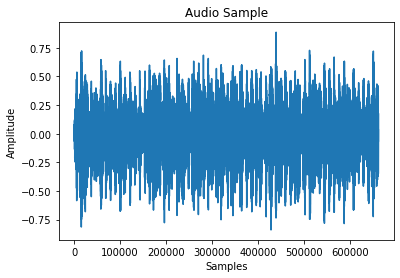

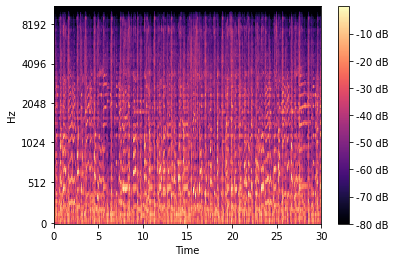

In [21]:
# original
visualize(sample, sr)

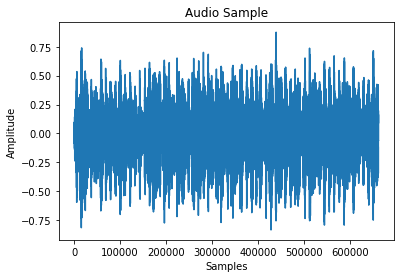

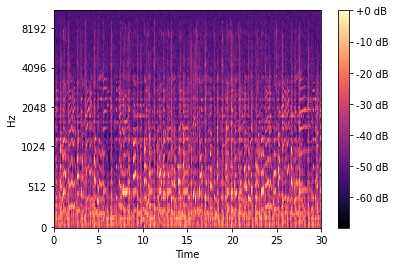

In [22]:
# noise
noise_sample = add_noise(sample, sample_rate=sr)
visualize(noise_sample, sr)

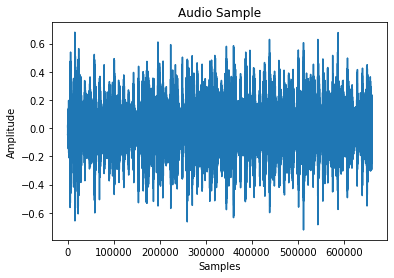

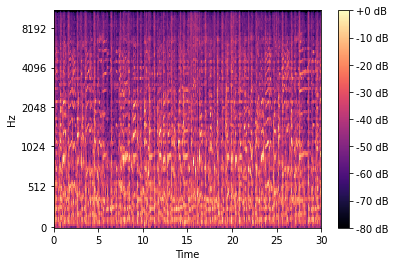

In [23]:
# pitch
pitch_sample = pitch_shift(sample, sample_rate=sr)
visualize(pitch_sample, sr)